# 네이버 웹툰 데이터셋 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('naver_webtoon_data.csv')
df = pd.DataFrame(data)
df

,id,title,author,genre,description,rating,date,completed,age,free,link
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.11,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.05.28 22:58,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.94,2022.06.01 22:57,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...
...,...,...,...,...,...,...,...,...,...,...,...
1851,718018,[드라마원작] 알고있지만,정서,"스토리, 로맨스","""넌 내가 나비라는걸 알고 있잖아.""알면서도 빠지고 싶은 사랑<투명한 동거> 정서 ...",9.97,2019.07.17,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
1852,697679,[드라마원작] 쌉니다 천리...,김규삼,"스토리, 개그","""고객은 왕이 아니다, 직원이 왕이다!""병맛 드라마를 뛰어넘는 미친 상상력의 원작 웹툰",9.98,2018.06.21,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=6...
1853,675393,[드라마원작] 한번 더 해요,미티 / 구구,"스토리, 드라마",결혼 8년차 부부. 성대광과 유선영. 대학시절 킹카 퀸카로 CC로 만나 결혼까지 골...,9.91,2018.03.22,True,18세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
1854,677536,[드라마원작] 내 ID는 ...,기맹기,"스토리, 로맨스","못생긴 얼굴에서 미인으로 새롭게 태어난 그녀, 강미래! 그런데... 어디서 본 듯 한데?",9.83,2017.12.29,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...


In [4]:
webtoon_descript = df['description']

In [48]:
# description 컬럼만 추출하여 txt 파일로 저장
# to_csv 함수에서 확장자를 .txt로 지정하면 그냥 txt파일로 저장됨
# index=False 인자를 주면 인덱스 없이 저장
# sep= 인자를 안 주면 , 로 구분된 txt파일이 저장됨
webtoon_descript = webtoon_descript.applymap(lambda x: x.replace('\u200b', '')
webtoon_descript.to_csv('webtoon_keyword.txt', encoding='euc-kr')

SyntaxError: invalid syntax (1495213942.py, line 6)

In [50]:
# 자연어 처리기에 넣어야하므로
# open과 read 함수를 이용하여 변수 저장
webtoon_descript = open('webtoon_keyword.txt').read()

In [6]:
!pip install wordcloud

In [2]:
from wordcloud import WordCloud

In [8]:
!pip install konlpy

In [3]:
from konlpy.tag import Okt

In [4]:
from collections import Counter

In [52]:
twitter = Okt()

keyword = []
keyword = twitter.pos(webtoon_descript)

In [53]:
noun_adj_list = []

for word, tag in keyword:
    if tag in ['noun', 'Adjective']:
        noun_adj_list.append(word)
        
counts = Counter(noun_adj_list)
tags = counts.most_common(40)

In [65]:
tags

[('같은', 4),
 ('없는', 2),
 ('있을까', 2),
 ('있는', 2),
 ('흔한', 1),
 ('박복한', 1),
 ('있었다', 1),
 ('뿐인', 1),
 ('싫어해요', 1),
 ('아슬아슬한', 1),
 ('좋아하던', 1),
 ('인한', 1),
 ('당연하게만', 1),
 ('소중함을', 1),
 ('강한', 1),
 ('자유롭게', 1),
 ('있어도', 1),
 ('행복하게', 1),
 ('고군', 1),
 ('그러던', 1),
 ('이상한', 1),
 ('아닌', 1),
 ('행복한', 1),
 ('무심하거나', 1),
 ('수상하다', 1),
 ('험난한', 1),
 ('기묘한', 1),
 ('서툴고', 1),
 ('어색했던', 1),
 ('헷갈리고', 1),
 ('서툴기만', 1),
 ('당당하고', 1),
 ('솔직하게', 1),
 ('성공할', 1),
 ('솔직하지', 1),
 ('어떻게', 1),
 ('없기로', 1),
 ('높은', 1),
 ('있거든요', 1),
 ('아니', 1)]

In [68]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgunsl.ttf', background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

In [69]:
cloud

In [70]:
print(cloud)

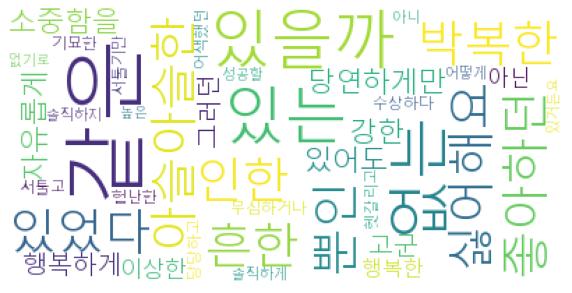

In [71]:
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

클라우드 시각화는 했는데
데이터셋 자체가 중복키워드를 뽑아내기에 부적합했음


- 유사한 다른 데이터셋으로 진행

In [5]:
data = pd.read_csv('naver_webtoon_data2.csv')
df = pd.DataFrame(data)
df

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
0,0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.62,4.2M,"She's young, single and about to achieve her d...",UP EVERY TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...
1,1,True Beauty,Yaongyi,39.9M,Romance,9.60,6.4M,"After binge-watching beauty videos online, a s...",UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/truebeauty...
2,2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.81,2.1M,After making a grisly discovery in the country...,UP EVERY SATURDAY,https://www.webtoons.com/en/romance/midnight-p...
3,3,Age Matters,Enjelicious,25.9M,Romance,9.79,3.5M,She's a hopeless romantic who's turning 30's ...,UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/age-matter...
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.85,1.5M,When vampires destroy her chance to have the n...,UP EVERY THURSDAY,https://www.webtoons.com/en/supernatural/unhol...
...,...,...,...,...,...,...,...,...,...,...
564,564,Third Shift Society,Meredith Moriarty,"8,66,428",Supernatural,9.78,376.9K,"Life's funny. One minute you're jobless, deep ...",UP EVERY FRIDAY,https://www.webtoons.com/en/supernatural/third...
565,565,Adamsville,Michael Regina,"1,84,981",Mystery,9.32,60.4K,"""Adamsville"" is an all ages series about two m...",COMPLETED,https://www.webtoons.com/en/mystery/adamsville...
566,566,WEBTOON Now,LOZOLZ / Wyatt the Cat,1.9M,Informative,9.25,459.2K,Get your WEBTOON news here!,UP EVERY MONDAY,https://www.webtoons.com/en/tiptoon/webtoon-no...
567,567,Staying Healthy Together,Various Artists,1.5M,Informative,9.76,204.6K,A series of tips for staying safe during the C...,COMPLETED,https://www.webtoons.com/en/tiptoon/staying-he...


In [80]:
df.sort_values('Genre')

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
43,43,Neon Revenge,MURO,"1,40,430",Action,9.68,267.3K,No one would have ever guessed that nerdy-look...,UP EVERY WEDNESDAY,https://www.webtoons.com/en/fantasy/the-spark-...
223,223,Code Adam,Atterozen,3M,Action,9.77,766K,They were trained as children to become super-...,UP EVERY MONDAY,https://www.webtoons.com/en/action/code-adam/l...
420,420,REAWAKENED MAN,Yongtaek Chae / Jaehan Kim,"1,03,691",Action,9.45,145.8K,"If there's one thing Hwan Seok can't stand, it...",UP EVERY TUESDAY,https://www.webtoons.com/en/action/reawaken-ma...
242,242,microHUNTER,NAGATERBANG,"47,983",Action,9.55,328.3K,"While out to get his sister's favorite snack, ...",UP EVERY FRIDAY,https://www.webtoons.com/en/action/sarimin/lis...
208,208,I Get Stronger the More I Eat,Kitaeon / Frost Mourne,"1,79,307",Action,8.45,210.9K,"Known as ""Pet Shop,"" Mr. Kim has the unique ab...",UP EVERY SATURDAY,https://www.webtoons.com/en/action/i-get-stron...
...,...,...,...,...,...,...,...,...,...,...
88,88,Bastard,Carnby Kim / Youngchan Hwang,7M,Thriller,9.87,1.5M,There is a serial killer in my house!,COMPLETED,https://www.webtoons.com/en/thriller/bastard/l...
545,545,Rotten,Goodguy,1.1M,Thriller,9.68,386.1K,"Jaeshin sees dead people, and Officer Han can ...",COMPLETED,https://www.webtoons.com/en/thriller/rotten/li...
546,546,Delusion,Hongjacga,"8,02,309",Thriller,9.79,189.6K,"It's 1935 in Gyeongseong, and struggling artis...",COMPLETED,https://www.webtoons.com/en/thriller/delusion/...
538,538,Shriek,Various Artists,"3,77,712",Thriller,9.75,337.6K,Prepare to swallow your screams. This horror a...,COMPLETED,https://www.webtoons.com/en/thriller/shriek/li...


In [86]:
df['Genre']

0           Romance
1           Romance
2           Romance
3           Romance
4      Supernatural
           ...     
564    Supernatural
565         Mystery
566     Informative
567     Informative
568     Informative
Name: Genre, Length: 569, dtype: object

In [6]:
webtoon_genre = df['Genre']
webtoon_genre.to_csv('webtoon_genre_cloud.txt', encoding='euc-kr', index=False)

In [8]:
text = open('webtoon_genre_cloud.txt').read()
text

'Genre\nRomance\nRomance\nRomance\nRomance\nSupernatural\nFantasy\nSupernatural\nAction\nRomance\nDrama\nRomance\nDrama\nDrama\nFantasy\nFantasy\nRomance\nRomance\nAction\nThriller\nRomance\nSupernatural\nDrama\nDrama\nFantasy\nMystery\nDrama\nRomance\nThriller\nRomance\nRomance\nRomance\nRomance\nRomance\nAction\nRomance\nRomance\nDrama\nDrama\nHistorical\nDrama\nRomance\nFantasy\nRomance\nAction\nFantasy\nFantasy\nRomance\nFantasy\nDrama\nRomance\nDrama\nDrama\nComedy\nFantasy\nThriller\nDrama\nThriller\nFantasy\nDrama\nDrama\nSci-fi\nAction\nDrama\nSci-fi\nSlice of life\nDrama\nMystery\nHistorical\nFantasy\nDrama\nDrama\nSlice of life\nDrama\nThriller\nAction\nMystery\nDrama\nDrama\nFantasy\nHeartwarming\nDrama\nThriller\nDrama\nDrama\nFantasy\nRomance\nDrama\nDrama\nThriller\nRomance\nRomance\nDrama\nSupernatural\nDrama\nRomance\nDrama\nRomance\nRomance\nDrama\nDrama\nAction\nDrama\nThriller\nFantasy\nRomance\nSupernatural\nRomance\nDrama\nDrama\nFantasy\nSuperhero\nRomance\nRomanc

In [115]:
type(text)

str

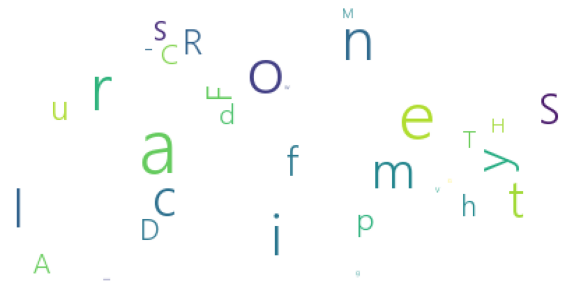

In [113]:
# twitter = Okt()

# keyword = []
# keyword = twitter.pos(text)

# noun_adj_list = []

# for word, tag in text:
#     if tag in ['noun', 'Adjective']:
#         noun_adj_list.append(word)
        
counts = Counter(text)
tags = counts.most_common(40)

wc2 = WordCloud(font_path='C:\\Windows\\Fonts\\malgunsl.ttf', background_color="white", max_font_size=60)
cloud2 = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud2)
plt.show()

In [108]:
counts

Counter({'G': 1,
         'e': 378,
         'n': 273,
         'r': 341,
         '\n': 570,
         'R': 90,
         'o': 323,
         'm': 209,
         'a': 479,
         'c': 222,
         'S': 150,
         'u': 92,
         'p': 69,
         't': 205,
         'l': 205,
         'F': 95,
         's': 118,
         'y': 165,
         'A': 47,
         'i': 259,
         'D': 60,
         'T': 35,
         'h': 61,
         'M': 9,
         'H': 26,
         'C': 52,
         'd': 52,
         '-': 32,
         'f': 135,
         ' ': 98,
         'w': 2,
         'g': 2,
         'I': 5,
         'v': 5})

In [7]:
# 영어 분석기 사용하려 했으나
# 잘 안 돼서 그냥 텍스트 번역기 돌리기로 함

!pip install googletrans==4.0.0-rc1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.



  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17415 sha256=02834068c0e77b7709f1ee05c577e7a86362e023d4f2ff9aaa9ba423b470a0a1
  Stored in directory: c:\users\hyesu\appdata\local\pip\cache\wheels\a9\25\af\715361fa79594524c89c75d293def652045f3fdce6ca398712
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.12.0
    Uninstalling h11-0.12.0:
      Successfully uninstalled h11-0.12.0
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0


In [9]:
from googletrans import Translator
translator = Translator()

a = translator.translate(text, src='en', dest='ko')

In [10]:
text_trans = a
text_trans = str(text_trans)

In [35]:
text_trans2 = str(a.text)
text_trans3 = text_trans2.split('\n')

In [36]:
text_trans3

['장르',
 '로맨스',
 '로맨스',
 '로맨스',
 '로맨스',
 '신의 조화',
 '공상',
 '신의 조화',
 '동작',
 '로맨스',
 '드라마',
 '로맨스',
 '드라마',
 '드라마',
 '공상',
 '공상',
 '로맨스',
 '로맨스',
 '동작',
 '스릴러',
 '로맨스',
 '신의 조화',
 '드라마',
 '드라마',
 '공상',
 '신비',
 '드라마',
 '로맨스',
 '스릴러',
 '로맨스',
 '로맨스',
 '로맨스',
 '로맨스',
 '로맨스',
 '동작',
 '로맨스',
 '로맨스',
 '드라마',
 '드라마',
 '역사적인',
 '드라마',
 '로맨스',
 '공상',
 '로맨스',
 '동작',
 '공상',
 '공상',
 '로맨스',
 '공상',
 '드라마',
 '로맨스',
 '드라마',
 '드라마',
 '코메디',
 '공상',
 '스릴러',
 '드라마',
 '스릴러',
 '공상',
 '드라마',
 '드라마',
 '공상 과학',
 '동작',
 '드라마',
 '공상 과학',
 '삶의 슬라이스',
 '드라마',
 '신비',
 '역사적인',
 '공상',
 '드라마',
 '드라마',
 '삶의 슬라이스',
 '드라마',
 '스릴러',
 '동작',
 '신비',
 '드라마',
 '드라마',
 '공상',
 '마음 흐뭇한',
 '드라마',
 '스릴러',
 '드라마',
 '드라마',
 '공상',
 '로맨스',
 '드라마',
 '드라마',
 '스릴러',
 '로맨스',
 '로맨스',
 '드라마',
 '신의 조화',
 '드라마',
 '로맨스',
 '드라마',
 '로맨스',
 '로맨스',
 '드라마',
 '드라마',
 '동작',
 '드라마',
 '스릴러',
 '공상',
 '로맨스',
 '신의 조화',
 '로맨스',
 '드라마',
 '드라마',
 '공상',
 '슈퍼 히어로',
 '로맨스',
 '로맨스',
 '공상',
 '드라마',
 '로맨스',
 '스릴러',
 '드라마',
 '드라마',
 '드라마',
 '드라마',
 '삶의 슬라이스',
 '공상',
 '

In [51]:
# 구글번역기 라이브러리를 통해 한글로 변환한 데이터셋
# 장르 데이터로 활용하기에 부적합한 속성들의 이름을 바꿔줌
text_trans4 = []
for i in text_trans3:
    if i == '삶의 슬라이스':
        i = '일상물'
    elif i == '신의 조화':
        i = '초자연'
    elif i == '유익한':
        i = '정보전달적'
    elif i == '동작':
        i = '액션'       
    text_trans4.append(i)
    
text_trans4

['장르',
 '로맨스',
 '로맨스',
 '로맨스',
 '로맨스',
 '초자연',
 '공상',
 '초자연',
 '액션',
 '로맨스',
 '드라마',
 '로맨스',
 '드라마',
 '드라마',
 '공상',
 '공상',
 '로맨스',
 '로맨스',
 '액션',
 '스릴러',
 '로맨스',
 '초자연',
 '드라마',
 '드라마',
 '공상',
 '신비',
 '드라마',
 '로맨스',
 '스릴러',
 '로맨스',
 '로맨스',
 '로맨스',
 '로맨스',
 '로맨스',
 '액션',
 '로맨스',
 '로맨스',
 '드라마',
 '드라마',
 '역사적인',
 '드라마',
 '로맨스',
 '공상',
 '로맨스',
 '액션',
 '공상',
 '공상',
 '로맨스',
 '공상',
 '드라마',
 '로맨스',
 '드라마',
 '드라마',
 '코메디',
 '공상',
 '스릴러',
 '드라마',
 '스릴러',
 '공상',
 '드라마',
 '드라마',
 '공상 과학',
 '액션',
 '드라마',
 '공상 과학',
 '일상물',
 '드라마',
 '신비',
 '역사적인',
 '공상',
 '드라마',
 '드라마',
 '일상물',
 '드라마',
 '스릴러',
 '액션',
 '신비',
 '드라마',
 '드라마',
 '공상',
 '마음 흐뭇한',
 '드라마',
 '스릴러',
 '드라마',
 '드라마',
 '공상',
 '로맨스',
 '드라마',
 '드라마',
 '스릴러',
 '로맨스',
 '로맨스',
 '드라마',
 '초자연',
 '드라마',
 '로맨스',
 '드라마',
 '로맨스',
 '로맨스',
 '드라마',
 '드라마',
 '액션',
 '드라마',
 '스릴러',
 '공상',
 '로맨스',
 '초자연',
 '로맨스',
 '드라마',
 '드라마',
 '공상',
 '슈퍼 히어로',
 '로맨스',
 '로맨스',
 '공상',
 '드라마',
 '로맨스',
 '스릴러',
 '드라마',
 '드라마',
 '드라마',
 '드라마',
 '일상물',
 '공상',
 '드라마',
 '로맨스',
 '드라마',


In [53]:
text_trans4.remove('장르')
text_trans4

['로맨스',
 '로맨스',
 '로맨스',
 '로맨스',
 '초자연',
 '공상',
 '초자연',
 '액션',
 '로맨스',
 '드라마',
 '로맨스',
 '드라마',
 '드라마',
 '공상',
 '공상',
 '로맨스',
 '로맨스',
 '액션',
 '스릴러',
 '로맨스',
 '초자연',
 '드라마',
 '드라마',
 '공상',
 '신비',
 '드라마',
 '로맨스',
 '스릴러',
 '로맨스',
 '로맨스',
 '로맨스',
 '로맨스',
 '로맨스',
 '액션',
 '로맨스',
 '로맨스',
 '드라마',
 '드라마',
 '역사적인',
 '드라마',
 '로맨스',
 '공상',
 '로맨스',
 '액션',
 '공상',
 '공상',
 '로맨스',
 '공상',
 '드라마',
 '로맨스',
 '드라마',
 '드라마',
 '코메디',
 '공상',
 '스릴러',
 '드라마',
 '스릴러',
 '공상',
 '드라마',
 '드라마',
 '공상 과학',
 '액션',
 '드라마',
 '공상 과학',
 '일상물',
 '드라마',
 '신비',
 '역사적인',
 '공상',
 '드라마',
 '드라마',
 '일상물',
 '드라마',
 '스릴러',
 '액션',
 '신비',
 '드라마',
 '드라마',
 '공상',
 '마음 흐뭇한',
 '드라마',
 '스릴러',
 '드라마',
 '드라마',
 '공상',
 '로맨스',
 '드라마',
 '드라마',
 '스릴러',
 '로맨스',
 '로맨스',
 '드라마',
 '초자연',
 '드라마',
 '로맨스',
 '드라마',
 '로맨스',
 '로맨스',
 '드라마',
 '드라마',
 '액션',
 '드라마',
 '스릴러',
 '공상',
 '로맨스',
 '초자연',
 '로맨스',
 '드라마',
 '드라마',
 '공상',
 '슈퍼 히어로',
 '로맨스',
 '로맨스',
 '공상',
 '드라마',
 '로맨스',
 '스릴러',
 '드라마',
 '드라마',
 '드라마',
 '드라마',
 '일상물',
 '공상',
 '드라마',
 '로맨스',
 '드라마',
 '로맨스',

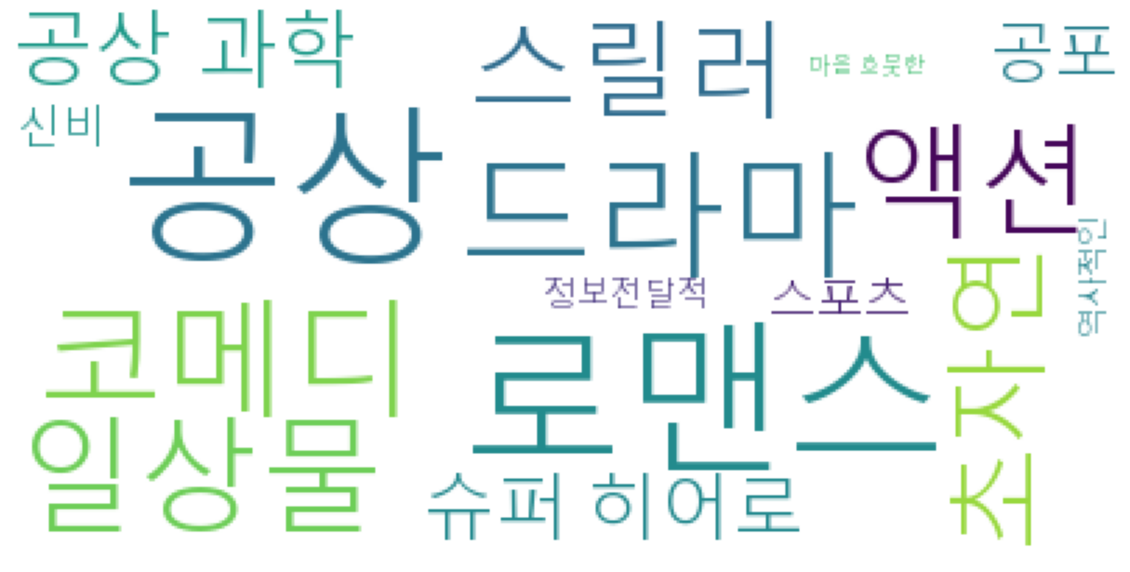

In [54]:
twitter = Okt()

# keyword = []
# keyword = twitter.pos(text_trans2)

# noun_adj_list = []

# for word, tag in text_trans2:
#     if tag in ['noun', 'Adjective']:
#         noun_adj_list.append(word)

counts = Counter(text_trans4)
tags = counts.most_common(20)

wc2 = WordCloud(font_path='C:\\Windows\\Fonts\\malgunsl.ttf', background_color="white", max_font_size=60)
cloud2 = wc2.generate_from_frequencies(dict(tags))

plt.figure(figsize=(20,11))
plt.axis('off')
plt.imshow(cloud2)
plt.show()

In [31]:
counts

collections.Counter